# Estruturação das etapas

1 - importar bibliotecas e base de dados  
2 - preparar a base de dados  
3 - fazer análises  
4 - criar modelos de IA e fazer comparações  
5 - escolher e aplicar o melhor modelo  

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# formatando para melhor visualização
pd.set_option("display.max_columns", None)
pd.set_option("display.precision", 2)

In [52]:
diabetes_df = pd.read_csv("diabetes.csv")

In [53]:
diabetes_df.isnull().sum() 
# nenhum valor vazio

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [54]:
diabetes_df.info() 
# target -> outcome 
# tipos das váriaveis não precisam de conversão

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [55]:
# medidas estatísticas

valor_unico_coluna = []
for i in diabetes_df.columns.to_list():
    print(i,'->', len(diabetes_df[i].astype(str).value_counts()))
    valor_unico_coluna.append(len(diabetes_df[i].astype(str).value_counts()))


diabetes_df.describe()

Pregnancies -> 17
Glucose -> 136
BloodPressure -> 47
SkinThickness -> 51
Insulin -> 186
BMI -> 248
DiabetesPedigreeFunction -> 517
Age -> 52
Outcome -> 2


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


Outcome
0    500
1    268
dtype: int64

<Axes: title={'center': 'OUTCOME'}, xlabel='Outcome'>

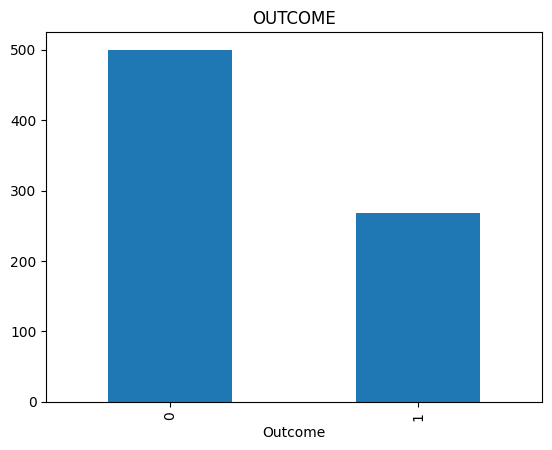

In [56]:
# métricas do target

display(diabetes_df.groupby(['Outcome']).size())

diabetes_df.Outcome.value_counts().plot(kind='bar', title='OUTCOME')

# muito desbalanceado